연습 문제

문제 1: 특정 날짜의 데이터 가져오기
### 질문: 2023년 5월 15일의 데이터를 가져오세요.

문제 2: 특정 기간의 데이터 가져오기
### 질문: 2022년 전체 데이터만 추출하세요.

문제 3: 조건에 맞는 데이터 필터링
### 질문: 종가가 2달러 이하인 날의 데이터를 추출하세요.

문제 4: 거래량이 많은 날 분석
### 질문: 거래량이 2백만 이상인 데이터를 추출하고, 해당 데이터의 평균 종가를 계산하세요.

문제 5: 시각화
### 질문: 2021년 데이터를 사용하여 종가(Close)와 거래량(Volume)의 트렌드를 시각화하세요.

In [3]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# 1. TikTok 주가 데이터 다운로드
ticker = "TTOO"  # TikTok (티커 코드 예시)
tiktok_data = yf.download(ticker, start="2020-01-01", end="2023-12-31")

# 데이터 확인
print("TikTok 주가 데이터 샘플:\n", tiktok_data.head())

C:\Users\user\AppData\Local\Temp\ipykernel_14388\2535711376.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tiktok_data = yf.download(ticker, start="2020-01-01", end="2023-12-31")
[*********************100%***********************]  1 of 1 completed

TikTok 주가 데이터 샘플:
 Price        Close    High     Low    Open Volume
Ticker        TTOO    TTOO    TTOO    TTOO   TTOO
Date                                             
2020-01-02  5800.0  6500.0  5650.0  5950.0     72
2020-01-03  6150.0  6350.0  5650.0  5700.0     70
2020-01-06  5950.0  6200.0  5500.0  6150.0     84
2020-01-07  5950.0  6150.0  5800.0  6150.0     45
2020-01-08  5750.0  6000.0  5650.0  6000.0     44


In [ ]:
tiktok_data.columns() # 'MultiIndex' object is not callable

TypeError: 'MultiIndex' object is not callable

In [9]:
# df.loc['날짜'] 형식으로 원하는 날짜를 문자열로 지정
def specific_date_data():
    return tiktok_data.loc['2022-01-03']

In [11]:
# 2. 연습 문제 예제 생성
# 문제 1: 특정 날짜의 주가 정보 가져오기

print("\n2022-01-03의 데이터:\n", specific_date_data())




2022-01-03의 데이터:
 Price   Ticker
Close   TTOO      2830.0
High    TTOO      2875.0
Low     TTOO      2565.0
Open    TTOO      2565.0
Volume  TTOO       334.0
Name: 2022-01-03 00:00:00, dtype: float64


In [12]:
# df.loc['날짜범위 슬라이싱'] loc를 사용한 날짜 슬라이싱은 끝 지점을 포함
def one_year_data():
    return tiktok_data.loc['2021-01-01':'2021-12-31']

In [ ]:
# 문제 2: 특정 기간(1년)의 데이터 가져오기

print("\n2021년 TikTok 데이터:\n", one_year_data().head())


2021년 TikTok 데이터:
 Price        Close    High     Low    Open Volume
Ticker        TTOO    TTOO    TTOO    TTOO   TTOO
Date                                             
2021-01-04  6650.0  6650.0  5950.0  6050.0   1065
2021-01-05  7050.0  7100.0  6550.0  6965.0   1204
2021-01-06  6600.0  7100.0  6550.0  6950.0   1142
2021-01-07  7200.0  7250.0  6750.0  6850.0   1065
2021-01-08  7250.0  7600.0  7000.0  7200.0   1242 DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15',
               ...
               '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22',
               '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)


In [20]:
# 멀티 인덱스 컬럼을 선택할 때는 튜플 ('Close', 'TTOO') 사용 
# 마스킹 사용 
def high_price_data():
    mask = tiktok_data[('Close', 'TTOO')] >= 5000.0
    return tiktok_data.loc[mask]

In [21]:
# 문제 3: 종가(Close)가 5달러 이상인 날의 데이터 필터링
print("\n종가가 5달러 이상인 데이터:\n", high_price_data().head())


종가가 5달러 이상인 데이터:
 Price        Close    High     Low    Open Volume
Ticker        TTOO    TTOO    TTOO    TTOO   TTOO
Date                                             
2020-01-02  5800.0  6500.0  5650.0  5950.0     72
2020-01-03  6150.0  6350.0  5650.0  5700.0     70
2020-01-06  5950.0  6200.0  5500.0  6150.0     84
2020-01-07  5950.0  6150.0  5800.0  6150.0     45
2020-01-08  5750.0  6000.0  5650.0  6000.0     44


In [22]:
# 멀티 인덱스 컬럼을 선택할 때는 튜플 ('Volume', 'TTOO') 사용 
# 마스킹 사용 
def high_volume_data():
    mask = tiktok_data[('Volume', 'TTOO')] >= 1000000.0
    return tiktok_data.loc[mask]

In [24]:
# 문제 4: 거래량(Volume)이 1,000,000 이상인 날의 데이터 필터링
print("\n거래량이 1,000,000 이상인 데이터:\n", high_volume_data().head())


거래량이 1,000,000 이상인 데이터:
 Price      Close  High   Low  Open   Volume
Ticker      TTOO  TTOO  TTOO  TTOO     TTOO
Date                                       
2023-05-30  13.5  22.6  11.5  12.5  2337608
2023-06-01  10.6  13.2   8.9  12.5  1140790
2023-06-05   7.0  14.7   6.9  13.9  1436940
2023-06-06   7.9   9.2   7.0   8.2  1520514
2023-06-14   7.5   7.6   6.5   6.8  1211675


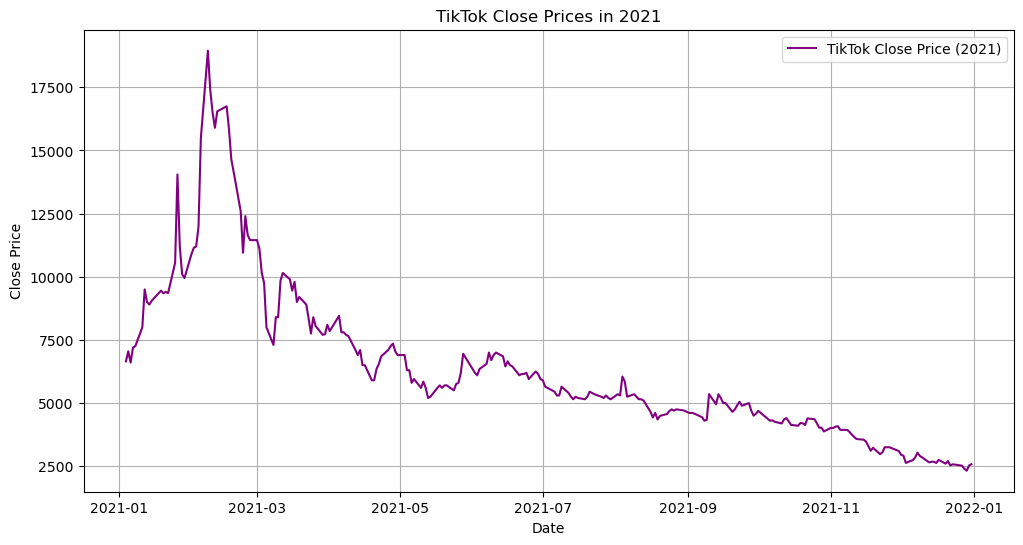

In [30]:
# 문제 5: 특정 기간의 종가 데이터를 시각화
plt.figure(figsize=(12, 6))
plt.plot(one_year_data().index, one_year_data()["Close"], label="TikTok Close Price (2021)", color="purple")
plt.title("TikTok Close Prices in 2021")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid()
plt.show()

TypeError: only length-1 arrays can be converted to Python scalars

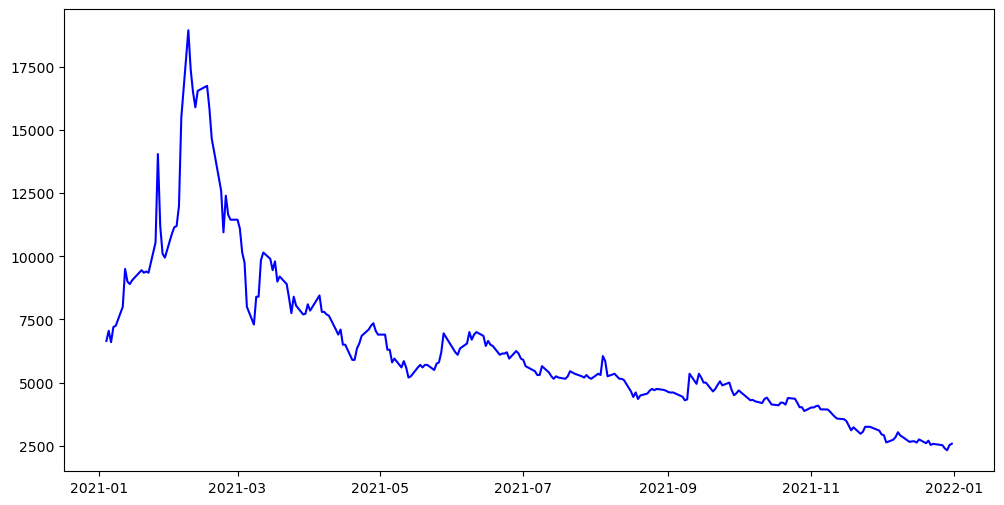

In [31]:

plt.figure(figsize=(12, 6))
plt.plot(one_year_data().index, one_year_data()["Close"], label="Close Price", color="blue")
plt.bar(one_year_data().index, one_year_data()["Volume"], label="Volume", color="orange", alpha=0.5)
plt.title("TikTok Stock Close Price and Volume in 2021")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()
